# Descriptive Statistics

meringkas/ summarize data dengan angka-angka statistik
- Central Tendency (tengah data)
- Spread (penyebaran data)

selain itu ada beberapa terminologi statistik:
- population vs sample
- outlier

*population* adalah keseluruhan dataset target. Misalkan kita mau tau rata-rata berat badan orang Indonesia maka population adalah semua orang Indonesia. semua umur dari bayi sampai kakek, sampai data historical, semua gender pria wanita, semua propinsi, luar dan dalam negri, ... data population biasanya tidak kita dapatkan. karena keterbatasan waktu dan resouce untuk bisa memiliki data seperti ini.

*sample* adalah sebagian dari data population yang digunakan untuk merepresentasikan data population. dari contoh diatas, kita ambil saja sampel dari setiap grup orang Indonesia, beberapa pria, beberapa wanita, beberapa orang di setiap umur, beberapa orang di masing masing propinsi, dll... kalau data sample tidak diambil dari subgroup2 berbeda, ada kemungkinan datanya *bias* atau condong ke grup tertentu dan tidak ideal digunakan sebagai sample.

*outlier* atau pencilan, adalah data yang berbeda secara signifikan dari sebagian besar data. Misalkan kita ada kumpulin 1000 data berat badan, dan kita ketemu tren tengahnya di 50 lalu penyebaran di 5, maka data yang di 100 akan termasuk outlier, jauh dari tengah sampai diluar toleransi penyebaran datanya.

---

## Central Tendency (tengah data)
1. Mean (rata rata)
2. Median (50% data memilki value diatas median , 50% data memilki value dibawah median)
3. Mode (satu angka yang paling sering muncul di data)

## Spread (penyebaran data)
1. standard deviation
2. variance
3. range (max - min)
4. percentile (titik data di posisi ke x%), dan quartile (percentile ke 25, 50, 75)
5. skewness (adanya beberapa data yang menarik rata2 ke arah positif/ negatif sementara nilai median dan mode tidak sama dengan rata2)
6. kurtosis (data banyak/ sedikit outlier)

### Correlation
korelasi antara dua variable, digunakan di linear regression

correlation coefficient "r" adalah angka korelasi, ada diantara -1 dan 1

- -1 artinya korelasi kuat negatif, A naik berarti B turun
- 0 tidak ada korelasi, A dan B tidak peduli satu sama lain
- +1 artinya korelasi kuat positif, A naik berarti B naik

In [ ]:
import numpy as np
import pandas as pd

# package statistik dan matematik
import math
import statistics
import scipy.stats

# package visualisasi
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# jika package tidak terinstall, boleh install dulu menggunakan pip dan nama package nya
# pip install math

Di contoh kali ini, kita coba cari angka2 statistik dari dataset harga emas https://raw.githubusercontent.com/stefkwan-h8/dataset/main/gold.csv

In [ ]:
df_gold = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/gold.csv")
df_gold.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD


In [ ]:
df_gold.tail(3)

,Date,Open,High,Low,Close,Volume,Currency
5703,2022-04-18,1978.5,2003.00,1974.4,1986.4,138130,USD
5704,2022-04-19,1981.2,1985.10,1945.5,1959.0,181440,USD
5705,2022-04-20,1952.1,1957.35,1941.2,1956.3,0,USD


In [ ]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5706 non-null   object 
 1   Open      5706 non-null   float64
 2   High      5706 non-null   float64
 3   Low       5706 non-null   float64
 4   Close     5706 non-null   float64
 5   Volume    5706 non-null   int64  
 6   Currency  5706 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.2+ KB


In [ ]:
# data cleaning: ubah tipe data biar sesuai
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

In [ ]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5706 non-null   datetime64[ns]
 1   Open      5706 non-null   float64       
 2   High      5706 non-null   float64       
 3   Low       5706 non-null   float64       
 4   Close     5706 non-null   float64       
 5   Volume    5706 non-null   int64         
 6   Currency  5706 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 312.2+ KB


In [ ]:
# minta min dan max
print(df_gold['Date'].min(), df_gold['Date'].max())

2000-01-04 00:00:00 2022-04-20 00:00:00


secara konteks ini adalah data harga emas dari tanggal 4 Jan 2000 sampai 20 Apr 2022

open - harga pas hari dimulai   
high - harga tertinggi di hari tersebut   
low - harga terendah di hari tersebut   
close - harga pas hari ditutup   
volume - jumlah dijual belikan di hari tersebut

kita cari angka2 central tendency, spread, dan correlation di data ini

- mean
- median
- mode

In [ ]:
df_gold['Open'].mean()

1051.3340641430073

rata2 harga emas adalah 1051 USD

tapi di data riil, kita perlu perhatikan tanggalnya juga. ini adalah rata dari tahun 2000 sampai 2022. biasanya kita perlunya dari rata rata di tahun atau di bulan tertentu.

In [ ]:
df_gold_2018 = df_gold[df_gold['Date'].dt.year == 2018]
df_gold_2018.head()

,Date,Open,High,Low,Close,Volume,Currency
4568,2018-01-01,1305.8,1309.7,1304.6,1308.7,0,USD
4569,2018-01-02,1400.1,1400.1,1400.1,1445.0,1,USD
4570,2018-01-03,1399.0,1399.0,1399.0,1448.9,1,USD
4571,2018-01-04,1407.3,1407.3,1407.3,1452.2,2,USD
4572,2018-01-05,1408.3,1408.3,1408.3,1453.2,1,USD


In [ ]:
len(df_gold_2018)

264

In [ ]:
df_gold_2018['Open'].mean()

1353.6742424242425

di tahun 2018, rata2 harga emas adalah 1353.7 USD

In [ ]:
df_gold_2018['Open'].median()

1344.15

In [ ]:
df_gold_2018['Open'].mode()

0     1265.8
1     1275.7
2     1280.2
3     1295.8
4     1299.8
5     1302.8
6     1305.8
7     1306.4
8     1333.1
9     1392.1
10    1393.9
11    1394.8
12    1405.3
13    1408.3
14    1421.7
15    1424.8
16    1428.1
17    1433.1
18    1435.9
Name: Open, dtype: float64

mode biasanya kurang berguna untuk data tipe continuous

**continuous** data adalah data yang terus berjalan seperti berat, tinggi, jarak, waktu, uang, harga. tidak ada pembatas yang pasti antar data. misalnya, kita bisa bilang ada perbedaan antara 50 dan 51 kg. ada perbedaan antara 50.000 kg dan 50.001 kg. pembatasnya tidak pasti.

**discrete** data yang pembatasnya pasti. seperti kategori. contohnya hasil lempar dadu, 1 2 3 4 5 6. tidak ada hasil yang di antara angka angka tersebut seperti 1.2.

---
lanjut, kita jelaskan lebih detail dan variasi dari mean yang ada. juga variasi teknik yang bisa gunakan untuk mencari angka2 ini

In [ ]:
data = df_gold_2018['Open']

# menggunakan statistics
statistics.mean(data)

1353.6742424242425

In [ ]:
# menggunakan numpy
np.mean(data)

1353.6742424242425

In [ ]:
# menggunakan pandas
data.mean()

1353.6742424242425

In [ ]:
# kalau datanya memiliki missing values, penggunaan statistics akan memberi error
data_dengan_nan = pd.concat([data, pd.Series(np.nan)])
data_dengan_nan

4568    1305.8
4569    1400.1
4570    1399.0
4571    1407.3
4572    1408.3
         ...  
4828    1343.0
4829    1346.5
4830    1348.3
4831    1347.1
0          NaN
Length: 265, dtype: float64

In [ ]:
# menggunakan statistics
statistics.mean(data_dengan_nan)

nan

In [ ]:
# menggunakan numpy
np.mean(data_dengan_nan)

1353.6742424242425

In [ ]:
# menggunakan pandas
data_dengan_nan.mean()

1353.6742424242425

## Weighted Mean
kadang value dari sebuah titik data dianggap lebih penting dari data lainnya, kita gunakan "weight" atau bobot.

Misalnya, kita punya nilai assignment 1,2,3 dan ujian akhir. kita anggap nilai ujian akhir memiliki bobot tertinggi di 40%, dan masing masing assignment di 20%.

In [ ]:
data_nilai = [20, 50, 90, 70]
data_bobot = [0.2,0.2,0.2,0.4]

# cari weighted mean pakai numpy
np.average(data_nilai, weights=data_bobot)

60.0

## Harmonic Mean
kadang data yang kita miliki punya beberapa value yang bersifat outlier, atau data kita punya banyak outier. banyaknya outlier membuat angka statistik kita untuk rata-rata menjadi tidak akurat.

kita bisa gunakan harmonic mean. harmonic mean tidak terpengaruh oleh outlier.

In [ ]:
contoh_data = [2, 4, 6, 5, 8, 4, 100]

# cari mean biasa
np.mean(contoh_data)

18.428571428571427

In [ ]:
# cari harmonic mean pakai statistics
statistics.harmonic_mean(contoh_data)

4.661487236403995

In [ ]:
# cari harmonic mean pakai scipy.stats
scipy.stats.hmean(contoh_data)

4.661487236403995

## Geometric Mean
saat kita mau cari rata-rata antara data yang tidak nyambung, misalnya: rata-rata rating dan jumlah rating seorang seller.

kita mau beli handphone online, kita cari seller yang rata rata rating nya tinggi dan jumlah rating nya banyak. kita punya pilihan:
- seller A, punya 1800 rating, dengan 9.5 rating
- seller B, punya 995 rating, dengan 9.8 rating

kita cari geometric mean untuk tau siapa yang lebih tinggi nilainya

In [ ]:
# kita cari geometric mean menggunakan scipy.stats
sellerA = scipy.stats.gmean([1800, 9.5])
sellerB = scipy.stats.gmean([995, 9.8])
print(sellerA, sellerB)

130.76696830622026 98.7471518576612


kita bisa membeli handphone dari seller A yang nilai nya lebih tinggi

In [ ]:
# kembali ke data harga emas kita di tahun 2018
data

4568    1305.8
4569    1400.1
4570    1399.0
4571    1407.3
4572    1408.3
         ...  
4827    1272.5
4828    1343.0
4829    1346.5
4830    1348.3
4831    1347.1
Name: Open, Length: 264, dtype: float64

# Median
median adalah titik tengah secara posisi di sebuah data

In [ ]:
# cari median dengan statistics
statistics.median(data)

1344.15

In [ ]:
statistics.median_low(data)

1343.7

In [ ]:
statistics.median_high(data)

1344.6

median harga emas kita ada di 1344.15

angka ini didapat dengan menjumlah dan membagi dua data: 1343.7 dan 1344.6

karena jumlah data kita genap (ada 264 data) maka median adalah hasil dari pembagian dua data yang ada di posisi tengah data kita.

In [ ]:
# cari median pakai numpy
np.median(data)

1344.15

In [ ]:
# cari median pakai pandas
data.median()

1344.15

# Mode
modus

mode adalah nilai yang paling sering muncul dari data kita. jikda tidak ada satu nilai yang paling sering muncul, bisa dibilang data kita multimodal, punya banyak mode.

note: di situasi multimodal, kebanyakan package python akan memilih satu mode saja yang pertama.

In [ ]:
# cari mode pakai statistics
statistics.mode(data)

1305.8

In [ ]:
# cari mode pakai scipy stats
scipy.stats.mode(data)

ModeResult(mode=1265.8, count=2)

package scipy stats memberi tahu kita jumlah kemunculan mode nya. di data kita ini, angka 1265.8 muncul sebanyak 2 kali.

In [ ]:
# cari mode pakai pandas
data.mode()

0     1265.8
1     1275.7
2     1280.2
3     1295.8
4     1299.8
5     1302.8
6     1305.8
7     1306.4
8     1333.1
9     1392.1
10    1393.9
11    1394.8
12    1405.3
13    1408.3
14    1421.7
15    1424.8
16    1428.1
17    1433.1
18    1435.9
Name: Open, dtype: float64

pandas memberi tahu kita semua mode yang kita miliki. data kita ini punya multimodal, semua data ini muncul sebanyak 2 kali (jumlah count kita ketahui dari scipy stats tadi)

di data yang sifatnya continuous seperti ini biasanya mode kurang berguna untuk memberi tahu tengah data.

# Measure of Variability / Spread
mengukur penyebaran data

setelah mengetahui tengah data, kita perlu konteks lebih untuk benar benar yakin tengah data tersebut seberapa spesifik - apakah datanya terkonsentrasi di tengah, atau banyak tersebar dari tengah tersebut.

- standard deviation
- variance
- skewness
- percentiles, quartiles (boxplot: quartile 1,2,3)
- range

## Standard Deviation dan Variance
Standard Deviation adalah variance yang di akar

Variance adalah standard deviation di kuadrat

kita dari dulu rata-ratanya
1. cari mean
2. kita cari tau setiap data di dataset kita seberapa jauh dari mean.
3. jumlahin "distance" setiap data ke mean
4. total dibagi ke jumlah data (pembaginya dikurangi 1 karena kita anggap datanya sample bukan population)
--> karena ada yang distance nya positif, ada yang negatif. kita kesulitan menjumlahkan. jadi, kita kuadratkan "distance" ini supaya nilainya positif semua

jadi, setiap titik data, kita cari perbedaannya dengan rata-rata, lalu kita kuadratkan (pasti positif), baru kita jumlahkan semuanya

hasil jumlah ini adalah variance.

hasil variance, kita akar, jadilah standard deviation.

info lebih lanjut, bisa lihat penjelasan secara visual di https://towardsdatascience.com/a-visual-interpretation-of-the-standard-deviation-30f4676c291c

In [ ]:
# variance dengan statistics
statistics.variance(data)

4288.849067864961

In [ ]:
# variance dengan numpy
np.var(data)

4272.603427456382

In [ ]:
np.var(data, ddof=1)

4288.8490678649605

secara default, numpy menganggap data kita adalah population, jadi kita perlu tambahkan opsi ddof=1 untuk bilang datanya adalah sample.

bisa dilihat variance data population lebih kecil dari variance data sample. karena kita selalu menggangap sample tidak seakurat population, penyebaran sample pasti lebih tinggi dari population.

In [ ]:
# variance dengan pandas
data.var()

4288.8490678649605

In [ ]:
data.var(ddof=0)

4272.603427456382

sebaliknya, untuk pandas, secara default dia anggap data kita adalah sample. kita perlu tambahkan opsi ddof=0 untuk bilang data kita population.

In [ ]:
# standard deviation untuk sample, dengan statistics
statistics.stdev(data)

65.48930498840984

In [ ]:
# standard deviation untuk sample, pakai numpy
np.std(data, ddof=1)

65.48930498840983

In [ ]:
# standard deviation untuk sample, pakai pandas
data.std()

65.48930498840983

## Skewness
melihat asimetri data

apakah data kita banyak yang nilai rendah, dengan beberapa nilai positif yang menarik rata2 ke arah positif? positive skew

apakah data kita banyak nilai tinggi, dengan beberapa nilai rendah yang menarik rata2 ke arah negatif? negative skew

apakah data kita simetris? symmetrical data

untuk data skewness:
- dibawah -1 atau diatas 1, berarti sangat skewed
- diantara -1 dan -0.5, atau diantara 0.5 dan 1, berarti sedikit skewed
- diantara -0.5 dan 0.5, berarti simetris

info lebih lanjut: https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241

In [ ]:
# cari skew dengan scipy stats
scipy.stats.skew(data, bias=False)

0.037383681971404986

In [ ]:
# cari skew dengan pandas
data.skew()

0.03738368197140501

terkecuali kita sendang mengerjakan data untuk peluncuran roket, hasil yang desimal berbeda seperti ini bukan masalah, kita anggap sama saja. ini terjadi karena cara hitung di komputer memiliki rounding error yang berbeda tergantung teknik yang dipakai.

# Percentiles dan Quartiles
p percentile adalah data di level p% dari sekumpulan data

misalkan kita mau tau 10% best students, kita bisa minta 90% percentile, dan semua yang nilainya diatas angka 90th percentile, bisa dibilang termasuk top 10%.

untuk percentile ke 25, 50, dan 75, mereka punya nama lebih.
Quartile 1, 2 dan 3.
- Quartile 1, Percentile 25
- Quartile 2, Percentile 50, Median
- Quartile 3, Percentile 75

In [ ]:
# cari percentile pakai statistics
statistics.quantiles(data, n=2, method='inclusive')

[1344.15]

hasil percentile ke-50, atau quartile-2, atau median

In [ ]:
statistics.quantiles(data, n=4, method='inclusive')

[1296.625, 1344.15, 1419.3000000000002]

hasil percentile ke 25, 50, 75

In [ ]:
# cari percentile pakai numpy
np.percentile(data, 50)

1344.15

In [ ]:
np.percentile(data, [25, 50, 75])

array([1296.625, 1344.15 , 1419.3  ])

In [ ]:
np.percentile(data, [10, 90])

array([1274.16, 1435.9 ])

berarti jika harga emas ada di bawah 1274.16 USD, maka itu termasuk harga emas terendah 10% di tahun 2018

lalu jika harganya diatas 1435.9 USD, itu termasuk top 10% harga emas tertinggi di tahun 2018

In [ ]:
# cari percentile pakai pandas
data.quantile(0.5)

1344.15

In [ ]:
data.quantile([0.25, 0.5, 0.75])

0.25    1296.625
0.50    1344.150
0.75    1419.300
Name: Open, dtype: float64

In [ ]:
data.quantile([0.1, 0.9])

0.1    1274.16
0.9    1435.90
Name: Open, dtype: float64

# Range
range adalah perbedaan data max dan min dalam dataset

In [ ]:
# cari range pakai numpy
np.ptp(data)

258.1999999999998

perbedaan harga emas tertinggi dan terendah di tahun 2018 adalah 259.2 USD

In [ ]:
# cari range pakai min dan max
data.max() - data.min()

258.1999999999998

## Interquartile Range (IQR)
perbedaan data antara Quartile 1 dan Quartile 3, atau perbedaan data antara Percentile 25 dan Percentile 75

In [ ]:
# cari dengan numpy
np.quantile(data, 0.75) - np.quantile(data, 0.25)

122.67499999999995

In [ ]:
np.percentile(data, 75) - np.percentile(data, 25)

122.67499999999995

In [ ]:
# cari dengan pandas
data.quantile(0.75) - data.quantile(0.25)

122.67499999999995

## Menghitung Outlier
Kita menghitung data termasuk outlier atau tidak dengan formula:

`lower_outlier = Q1 - 1.5*IQR`

`higher_outlier = Q3 + 1.5*IQR`

data yang ada di bawah lower_outlier dan diatas higher_outlier termasuk sebagai outlier

In [ ]:
Q1 = np.quantile(data, 0.25)
Q3 = np.quantile(data, 0.75)

IQR = Q3 - Q1

In [ ]:
# cari di data emas 2018 kita
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

1112.6125000000002
1603.3125


In [ ]:
# semua data di bawah 1112.6 dan diatas 1603.3 adalah outlier
outlier_bawah = data[data < lower_limit]
outlier_bawah

Series([], Name: Open, dtype: float64)

In [ ]:
outlier_atas = data[data > upper_limit]
outlier_atas

Series([], Name: Open, dtype: float64)

kebetulan untuk data kita tidak memilikit outlier

# Summary Descriptive Statistics
karena banyaknya angka statistic yang sering kita cari, pandas dan package statistics lainnya ada membuatkan shortcut untuk mendapat beberapa angka sekaligus

In [ ]:
# summary menggunakan scipy stats
scipy.stats.describe(data, ddof=1, bias=False)

DescribeResult(nobs=264, minmax=(1204.9, 1463.1), mean=1353.6742424242425, variance=4288.8490678649605, skewness=0.037383681971404986, kurtosis=-1.4270192975561757)

scipy stats describe ada kasih:
- jumlah data, nobs
- min dan max
- mean
- variance
- skewness
- kurtosis

In [ ]:
hasil_summary = scipy.stats.describe(data, ddof=1, bias=False)
hasil_summary.mean

1353.6742424242425

In [ ]:
# summary menggunakan pandas
data.describe()

count     264.000000
mean     1353.674242
std        65.489305
min      1204.900000
25%      1296.625000
50%      1344.150000
75%      1419.300000
max      1463.100000
Name: Open, dtype: float64

pandas describe ada kasih:
- jumlah data, count
- mean
- standard deviation, std
- min
- quartile 1,2,3
- max

In [ ]:
hasil_summary = data.describe()
hasil_summary['std']

65.48930498840983

# Correlation
correlation coefficient "r" adalah angka korelasi, ada diantara -1 dan 1

- -1 artinya korelasi kuat negatif, A naik berarti B turun
- 0 tidak ada korelasi, A dan B tidak peduli satu sama lain
- +1 artinya korelasi kuat positif, A naik berarti B naik

In [ ]:
data

4568    1305.8
4569    1400.1
4570    1399.0
4571    1407.3
4572    1408.3
         ...  
4827    1272.5
4828    1343.0
4829    1346.5
4830    1348.3
4831    1347.1
Name: Open, Length: 264, dtype: float64

In [ ]:
# kita coba ambil juga data volume, selain harga di tahun 2018
df_gold.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD


In [ ]:
df_gold2018 = df_gold[df_gold['Date'].dt.year == 2018]
df_gold2018.head()

,Date,Open,High,Low,Close,Volume,Currency
4568,2018-01-01,1305.8,1309.7,1304.6,1308.7,0,USD
4569,2018-01-02,1400.1,1400.1,1400.1,1445.0,1,USD
4570,2018-01-03,1399.0,1399.0,1399.0,1448.9,1,USD
4571,2018-01-04,1407.3,1407.3,1407.3,1452.2,2,USD
4572,2018-01-05,1408.3,1408.3,1408.3,1453.2,1,USD


Cari korelasi antara harga 'Open' dengan 'Volume'

Volume adalah jumlah jual beli stok emas di hari tersebut


In [ ]:
# cari dengan scipy stats
scipy.stats.pearsonr(df_gold2018['Open'], df_gold2018['Volume'])

PearsonRResult(statistic=0.12822271184648243, pvalue=0.03733438423795086)

scipy stats akan kasih 2 angka, r dan pvalue. kita ambil r nya saja.

In [ ]:
r, pvalue = scipy.stats.pearsonr(df_gold2018['Open'], df_gold2018['Volume'])
print(r)

0.12822271184648243


r nya adalah 0.128, artinya hampir tidak ada korelasi. angka ini mendekati 0 yang artinya sama sekali tidak ada korelasi. berarti, harga jual emas di kolom 'Open' tidak ada hubungannya dengan jumlah emas terjual di 'Volume'

In [ ]:
# cari dengan numpy
np.corrcoef(df_gold2018['Open'], df_gold2018['Volume'])

array([[1.        , 0.12822271],
       [0.12822271, 1.        ]])

untuk numpy, dia akan buatkan matrix correlation antara Open dengan Open, Open dengan Volume, Volume dengan Open, dan Volume dengan Volume.

makanya ada yang nilainya 1, karena itu dengan diri sendiri.

In [ ]:
np.corrcoef(df_gold2018['Open'], df_gold2018['Volume'])[0, 1]

0.12822271184648246

dengan teknik indexing, row pertama, kolom kedua, kita bisa ambil value r dari teknik ini

r nya sama, masih di 0.128

In [ ]:
# cari dengan pandas
df_gold2018['Open'].corr(df_gold2018['Volume'])

0.12822271184648246

In [ ]:
# extra: cari sekalian dengan angka2 linear regression
# menggunakan scipy stats
scipy.stats.linregress(df_gold2018['Open'], df_gold2018['Volume'])

LinregressResult(slope=11.296126179141954, intercept=-14519.14247212106, rvalue=0.12822271184648243, pvalue=0.0373343842379508, stderr=5.3977668986069, intercept_stderr=7315.331546145519)

linregress dari scipy stats akan kasih:
- slope
- intercept
- rvalue
- pvalue
- stderr
- intercept_stderr

kita bisa temukan formula linear regression dari sini: `ax + b = c`, atau `slope * (harga emas 'Open') + intercept = (jumlah terjual 'Volume')`

kita juga bisa temukan r correlation coefficient disini, yaitu rvalue

In [ ]:
hasil = scipy.stats.linregress(df_gold2018['Open'], df_gold2018['Volume'])
hasil.rvalue

0.12822271184648243

# Latihan
silahkah dicoba untuk membuat visualisasi dari dataset Gold kita
- Bar Chart
- Pie Chart
- boxplot
- histogram
- X-Y plot (scatter plot)

1. import data
2. Bar Chart: pilih dulu datanya mau ambil data yang mana dijadikan bar chart. misalnya, ambil data Volume untuk jadi bar chart, atau buat dulu kolom "Year", agregat rata2 per tahun, untuk buat bar chart jumlah volume penjualan/pembelian emas dari tahun ke tahun.
3. Pie Chart: pilih dulu datanya, misalnya mau ambil data perbandingan total penjualan stok emas, antara tahun ke tahun. kita totalin dulu kolom "Volume". kita buat kolom "Year". kita groupby "Year" dan di totalkan "Volume" untuk melihat total "Volume" per "Year". baru dijadikan Pie Chart
4. boxplot: misal bandingin harga emas per tahun
5. Histogram: misal bandingin harga emas
6. scatter plot: misal bandingin hubungan antara harga emas dengan tahun

Dataset lain yang punya value tipe text: https://raw.githubusercontent.com/stefkwan-h8/dataset/main/kidney_disease.csv

bisa dicoba membuat pie chart dengan menghitung dulu sum untuk setiap value text muncul berapa kali baru jadi pie chart

In [ ]:
df_gold

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.00,281.0,282.7,4,USD
1,2000-01-05,283.2,283.20,283.2,281.1,16,USD
2,2000-01-06,281.4,281.40,281.4,281.4,0,USD
3,2000-01-07,281.9,281.90,281.9,281.9,0,USD
4,2000-01-10,281.7,281.70,281.7,281.7,0,USD
...,...,...,...,...,...,...,...
5701,2022-04-13,1970.5,1985.80,1966.3,1984.7,132029,USD
5702,2022-04-14,1981.6,1984.00,1962.7,1974.9,139424,USD
5703,2022-04-18,1978.5,2003.00,1974.4,1986.4,138130,USD
5704,2022-04-19,1981.2,1985.10,1945.5,1959.0,181440,USD


In [ ]:
df_gold2 = df_gold.copy()

In [ ]:
# kolom baru Year dari kolom Date diambil year nya
df_gold2['Year'] = df_gold2['Date'].dt.year
df_gold2.head()

,Date,Open,High,Low,Close,Volume,Currency,Year
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD,2000
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD,2000
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD,2000
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD,2000
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD,2000


In [ ]:
# agregasi per Year, berapa jumlah Volume
gold_peryear_totalvolume = df_gold2.groupby('Year')['Volume'].sum()
gold_peryear_totalvolume

Year
2000     138086
2001     141539
2002     139028
2003     179042
2004     272352
2005     279736
2006     240198
2007     293608
2008     437276
2009     494743
2010     548360
2011     483044
2012     400497
2013     376843
2014     322134
2015     274841
2016     293562
2017     303009
2018     203843
2019      44821
2020      52292
2021     157022
2022    3576069
Name: Volume, dtype: int64

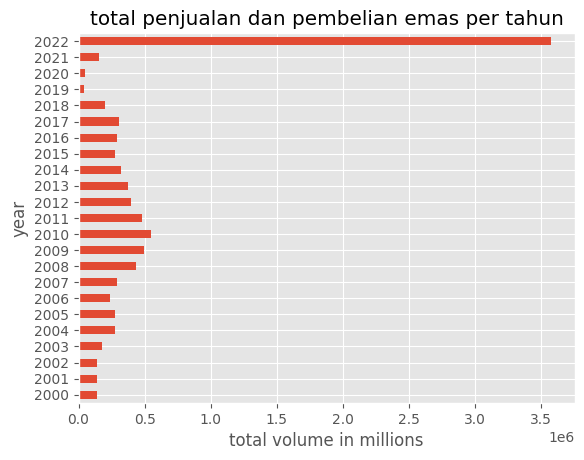

In [ ]:
# baru buat bar chart nya
gold_peryear_totalvolume.plot(kind='barh')

plt.xlabel('total volume in millions')
plt.ylabel('year')
plt.title('total penjualan dan pembelian emas per tahun')

plt.show()

kebetulan data kita sama, untuk melihat total penjualan emas, dan dibandingkan per tahunnya, kita bisa langsung buatkan pie chart

tapi, note kalau data kita dari 2000-2022 ada 23 data. pie chart jadi punya 23 slice, agak kebanyakan. kita bisa kurangi menjadi beberapa pilihan tahun saja. misalnya 2000-2005 jadi total 6 slice.

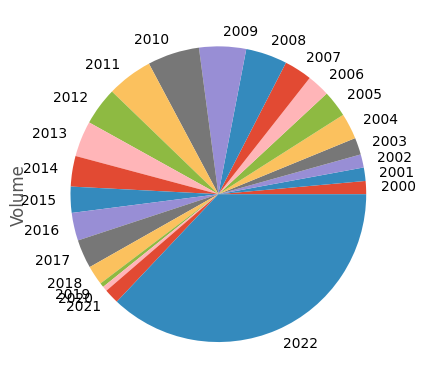

In [ ]:
gold_peryear_totalvolume.plot(kind='pie')

plt.show()

kita coba kurangi jadi 6 slice saja. misalkan pilihan 2000-2005

In [ ]:
gold_peryear_totalvolume.loc[2000:2005]

Year
2000    138086
2001    141539
2002    139028
2003    179042
2004    272352
2005    279736
Name: Volume, dtype: int64

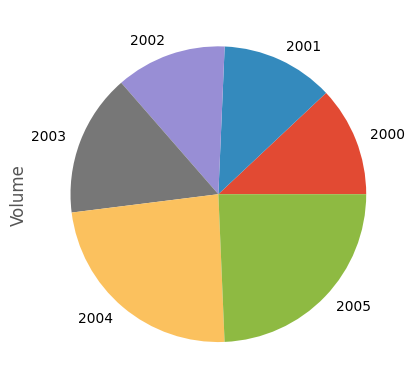

In [ ]:
gold_peryear_totalvolume.loc[2000:2005].plot(kind="pie")

plt.show()

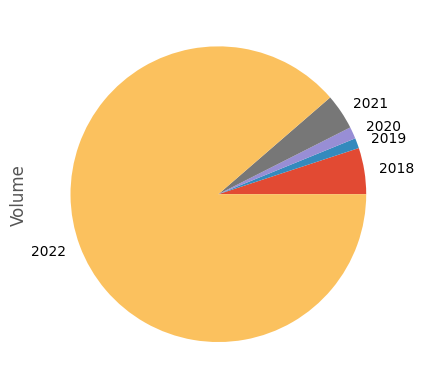

In [ ]:
# coba buat pie chart 2018-2022
gold_peryear_totalvolume.loc[2018:2022].plot(kind="pie")

plt.show()

boxplot

histogram

X-Y plot (scatter plot)

<Axes: >

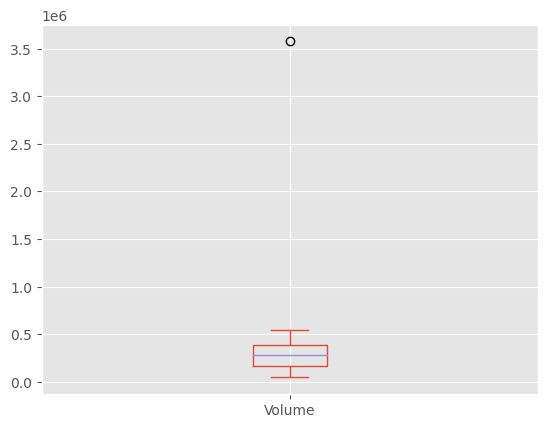

In [ ]:
gold_peryear_totalvolume.plot(kind="box")

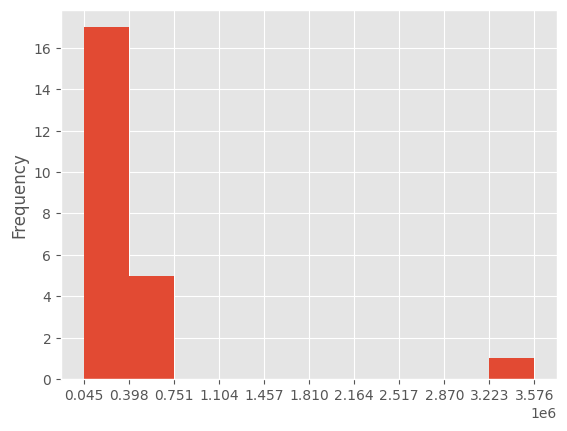

In [ ]:
n = 10
freq, bin_edges = np.histogram(gold_peryear_totalvolume, bins=n)

gold_peryear_totalvolume.plot(kind="hist", bins=n)

plt.xticks(bin_edges)
plt.show()

In [ ]:
gold_peryear_totalvolume2 = df_gold2.groupby('Year')[['Volume']].sum()
gold_peryear_totalvolume2 = gold_peryear_totalvolume2.reset_index()
gold_peryear_totalvolume2.head()

,Year,Volume
0,2000,138086
1,2001,141539
2,2002,139028
3,2003,179042
4,2004,272352


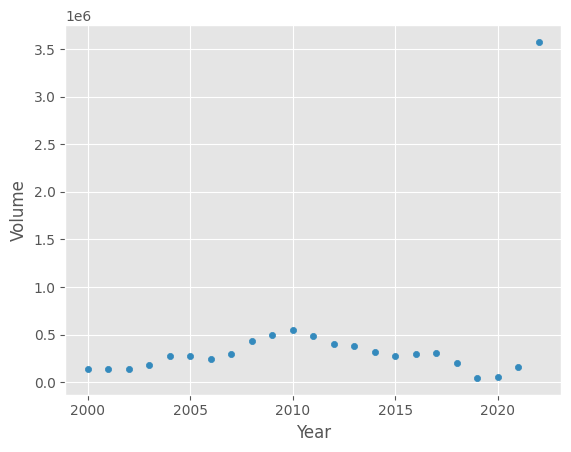

In [ ]:
gold_peryear_totalvolume2.plot(kind="scatter", x="Year", y="Volume")

plt.show()